In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Entanglement in the Stern-Gerlach Experiment
In this problem we want to consider Stern-Gerlach experiment with a more realistic approach.
Assume the electrons are shot towards the apparatus. The hamiltonian is as follows:

$H = \frac{P_z^2}{2m} - \mu \lambda z \sigma_z$


where the second term is from the interaction of the spin of the electron with the linear magnetic field.

The state of the system is a member of the tensor product space of spin and z-space. Let's make a concrete
z-space of 501 sites with $a = 0.01$ where he middle site is for $z=0$. Then, the state is a vector with 1002
coefficients.

For making the evolution matrix let's take the time steps to be $\epsilon = 0.01$ and $\hbar = 1$. 
Also let's assume $\mu \lambda = 1, m = 1$.

In [2]:
# constants
mu_lambda = 0.05
n = 501
a = 0.01
m = 1
epsilon = 0.01

# the z-space operator
z_op = np.asmatrix(np.kron(np.diag(np.linspace(-2.5, 2.5, 501)), np.eye(2)))

# spin operator
z_pauli = np.kron(np.matrix([[1, 0], [0, -1]]), np.eye(n))
z_pauli

matrix([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., -1., -0., -0.],
        [ 0.,  0.,  0., ..., -0., -1., -0.],
        [ 0.,  0.,  0., ..., -0., -0., -1.]])

In [3]:
## making the momentum operator
# making shift_op
shift_op = np.eye(n, k=1)
shift_op[n-1, 0] = 1
shift_op = np.asmatrix(shift_op)

# diagonalizing the shift_op
vals, vecs = np.linalg.eig(shift_op)

# making P
P = vecs * np.diag(np.angle(vals)) * vecs.H / a
P = np.kron(P, np.eye(2))
P.shape

(1002, 1002)

In [4]:
H = P ** 2 / (2 * m) - mu_lambda * z_op * z_pauli
H.shape

(1002, 1002)

Now we have the hamiltonian, let's generate the evolution operator $U = \exp(-i H \epsilon$, taking $\hbar=1$.

In [5]:
evolution = expm(-1j * H * epsilon)
evolution = np.asmatrix(evolution)
evolution

matrix([[0.02764122-0.03034474j, 0.        +0.j        ,
         0.02884795-0.02600231j, ..., 0.        +0.j        ,
         0.02884793-0.02600231j, 0.        +0.j        ],
        [0.        +0.j        , 0.02764122-0.03034474j,
         0.        +0.j        , ..., 0.02820039-0.02977587j,
         0.        +0.j        , 0.02884793-0.02600231j],
        [0.02884795-0.02600231j, 0.        +0.j        ,
         0.02764127-0.03034474j, ..., 0.        +0.j        ,
         0.02820039-0.02977587j, 0.        +0.j        ],
        ...,
        [0.        +0.j        , 0.02820039-0.02977587j,
         0.        +0.j        , ..., 0.02764127-0.03034474j,
         0.        +0.j        , 0.02884795-0.02600231j],
        [0.02884793-0.02600231j, 0.        +0.j        ,
         0.02820039-0.02977587j, ..., 0.        +0.j        ,
         0.02764122-0.03034474j, 0.        +0.j        ],
        [0.        +0.j        , 0.02884793-0.02600231j,
         0.        +0.j        , ..., 0.02884

## Section A
Let's take the initial state to be at $z = 0$ and spin up. Let's find the evolution to $t=10$

In [6]:
# making the z=0 state in z-space
z_0 = np.zeros((501, 1))
z_0[250, 0] = 1
z_0 = np.asmatrix(z_0)

# making the spin up state in spin space
spin_up = np.array([[1], [0]])

# making the initial state of the system.
init_state = np.kron(z_0, spin_up)

init_state.shape

(1002, 1)

In [7]:
# now to evolve the system to t = 10 = 1000 * epsilon
state = init_state

for _ in range(1000):
    state = evolution * state
    
state

matrix([[ 0.0430532 +0.00192862j],
        [ 0.        +0.j        ],
        [-0.01858411-0.04259706j],
        ...,
        [ 0.        +0.j        ],
        [ 0.0430532 +0.00192862j],
        [ 0.        +0.j        ]])

## Section B
Now for state $z=0$ and spin down. We follow the same procedure:

In [8]:
# making spin down in the spin space
spin_down = np.matrix([[0], [1]])


# making initial state
init_state = np.kron(z_0, spin_down)
init_state.shape

(1002, 1)

In [9]:
# now we evolve the system
state = init_state

for _ in range(1000):
    state = evolution * state

state

matrix([[ 0.        +0.j        ],
        [ 0.0430532 +0.00192862j],
        [ 0.        +0.j        ],
        ...,
        [-0.01858411-0.04259706j],
        [ 0.        +0.j        ],
        [ 0.0430532 +0.00192862j]])

## Section C
Now we try $z = 0$ and spin up in the x axis. In the spin space, this state is given as:
$|x, +> = \frac{1}{\sqrt{2}} (1, 1)^t$

In [10]:
# making spin +x
spin_x_up = np.matrix([[1], [1]]) / (2 ** 0.5)

# making the initial state
init_state = np.kron(z_0, spin_x_up)
init_state.shape

(1002, 1)

In [11]:
# evolve the state to t = 10
state = init_state

for _ in range(1000):
    state = evolution * state
    
state

matrix([[ 0.03044321+0.00136374j],
        [ 0.03044321+0.00136374j],
        [-0.01314095-0.03012067j],
        ...,
        [-0.01314095-0.03012067j],
        [ 0.03044321+0.00136374j],
        [ 0.03044321+0.00136374j]])

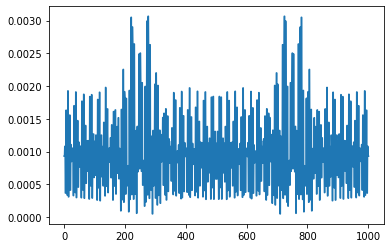

In [12]:
plt.plot(np.linspace(0, 1001, 1002), np.absolute(np.array(state)[:, 0]) ** 2)
plt.show()

Now let's check to see if this final state is entangled.
In order to do this, we need to generate the density operator of the state and take the trace.

If the trace is less than 1, then the state is entangled.

$\hat{\rho} = |\psi><\psi|, tr(\hat{\rho}) \leq 1$

In [13]:
# generating the density operator
density_op = state * state.H
density_op

matrix([[ 0.00092865+4.85781435e-22j,  0.00092865+2.06671152e-15j,
         -0.00044113+8.99049144e-04j, ..., -0.00044113+8.99049144e-04j,
          0.00092865+1.84090753e-16j,  0.00092865+7.18778607e-16j],
        [ 0.00092865-2.06671274e-15j,  0.00092865-1.70774817e-21j,
         -0.00044113+8.99049144e-04j, ..., -0.00044113+8.99049144e-04j,
          0.00092865-1.88261543e-15j,  0.00092865-1.34793435e-15j],
        [-0.00044113-8.99049144e-04j, -0.00044113-8.99049144e-04j,
          0.00107994-8.13474879e-21j, ...,  0.00107994+1.68675933e-15j,
         -0.00044113-8.99049144e-04j, -0.00044113-8.99049144e-04j],
        ...,
        [-0.00044113-8.99049144e-04j, -0.00044113-8.99049144e-04j,
          0.00107994-1.68674753e-15j, ...,  0.00107994+0.00000000e+00j,
         -0.00044113-8.99049144e-04j, -0.00044113-8.99049144e-04j],
        [ 0.00092865-1.84090753e-16j,  0.00092865+1.88261543e-15j,
         -0.00044113+8.99049144e-04j, ..., -0.00044113+8.99049144e-04j,
          0.00092865

In [14]:
np.trace(density_op)

(0.9999999999968892+1.8004992160645519e-19j)

?